In [1]:
import pandas as pd
import warnings
import sys
sys.path.append('../../')
from src.preparation.data import Data
from src.modeling.AverageByIdModel import AverageByIdModel
from src.modeling.AverageModel import AverageModel
from src.modeling.DampedBaselineModel import DampedBaselineModel
from src.modeling.BaselineItemCF import BaselineItemCFModel
from src.modeling.BaselineUserCF import BaselineUserCFModel
from src.modeling.KNNCFModel import KNNRecommender
from src.modeling.Content_based import ContentBased
from src.modeling.ALS import ALSRecommender
from src.modeling.Models import Models

warnings.filterwarnings('ignore')

In [2]:
# NO FILTERED DATA, RAW ONES.

# Script for smaller data. (ml-100k) #############
# datasets = Data.get_rating()

# Script for bigger data. (ml-20m) ##############
# datasets = Data.get_rating(bigger=True)

In [3]:
# FILTERED DATA, NON RAW ONES.

# Script for smaller data. (ml-100k) ################
datasets = Data.get_rating(filtered=True)

# Script for bigger data. (ml-20m) #####################
# datasets = Data.get_rating(filtered=True, bigger=True)

In [4]:
models = {}
# models.update({ 'AverageOnly': AverageModel()})
# models.update({'AverageMovieID': AverageByIdModel('movie_id')})
# models.update({'AverageUserID': AverageByIdModel('user_id')})
models.update({'RegularisedBaseline': DampedBaselineModel(damping_factor=10)})

# THE ONE THAT TAKES REALLY LONG.
models.update({'Genre CB:': ContentBased()})
models.update({'KNN CF': KNNRecommender(k=10, baseline_algo=DampedBaselineModel(damping_factor=10))})
models.update({'ALS': ALSRecommender(baseline_algo=DampedBaselineModel(damping_factor=10))})
models.update({'Item CF': BaselineItemCFModel()})
models.update({'User CF': BaselineUserCFModel()})

In [5]:
model = Models(models)

In [6]:
rmses, recalls = model.evaluate(datasets)

RegularisedBaseline
KFold Iteration 0 : Recall: 0.53  RMSE: 0.95 Time Taken: 5.24
KFold Iteration 1 : Recall: 0.53  RMSE: 0.96 Time Taken: 4.78
KFold Iteration 2 : Recall: 0.53  RMSE: 0.97 Time Taken: 4.58
KFold Iteration 3 : Recall: 0.54  RMSE: 0.96 Time Taken: 4.99
KFold Iteration 4 : Recall: 0.54  RMSE: 0.96 Time Taken: 4.7
Genre CB:
KFold Iteration 0 : Recall: 0.46  RMSE: 1.17 Time Taken: 147.37
KFold Iteration 1 : Recall: 0.48  RMSE: 1.14 Time Taken: 145.18
KFold Iteration 2 : Recall: 0.47  RMSE: 1.14 Time Taken: 158.14
KFold Iteration 3 : Recall: 0.46  RMSE: 1.14 Time Taken: 168.0
KFold Iteration 4 : Recall: 0.46  RMSE: 1.14 Time Taken: 148.8
KNN CF
KFold Iteration 0 : Recall: 0.55  RMSE: 0.92 Time Taken: 5.22
KFold Iteration 1 : Recall: 0.55  RMSE: 0.93 Time Taken: 5.04
KFold Iteration 2 : Recall: 0.54  RMSE: 0.94 Time Taken: 5.03
KFold Iteration 3 : Recall: 0.55  RMSE: 0.94 Time Taken: 5.03
KFold Iteration 4 : Recall: 0.54  RMSE: 0.94 Time Taken: 5.03
ALS
KFold Iteration 0 : Re

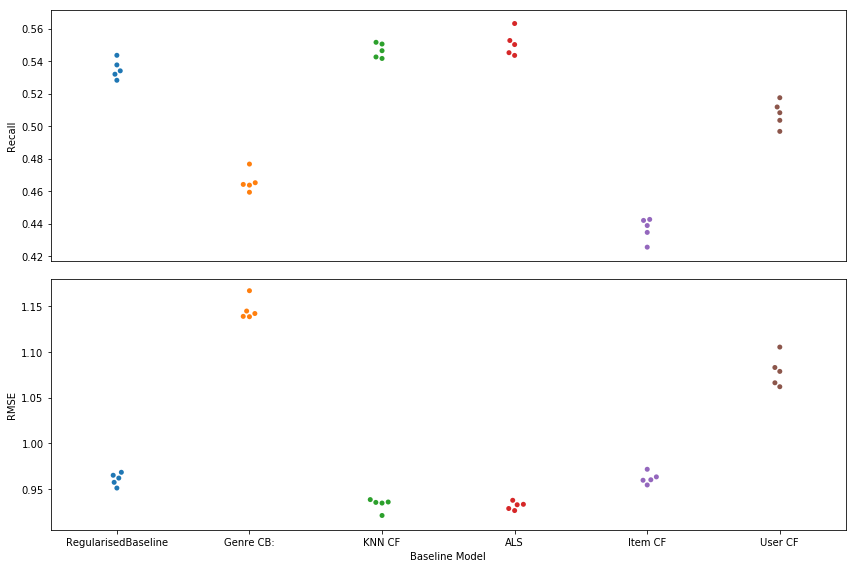

In [7]:
model.plot(rmses, recalls)